### Loan Approval Prediction: 

#### Problem Statement:

__About Company__ <br>
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

__Problem__ <br>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#### Dataset Description:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 


### Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import warnings
from pingouin import qqplot

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset\loan_approval.csv")
df.drop("Loan_ID", axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dataset Understanding

In [3]:
df.ndim

2

In [4]:
df.shape

(614, 12)

In [5]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [10]:
df.notna().sum()

Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

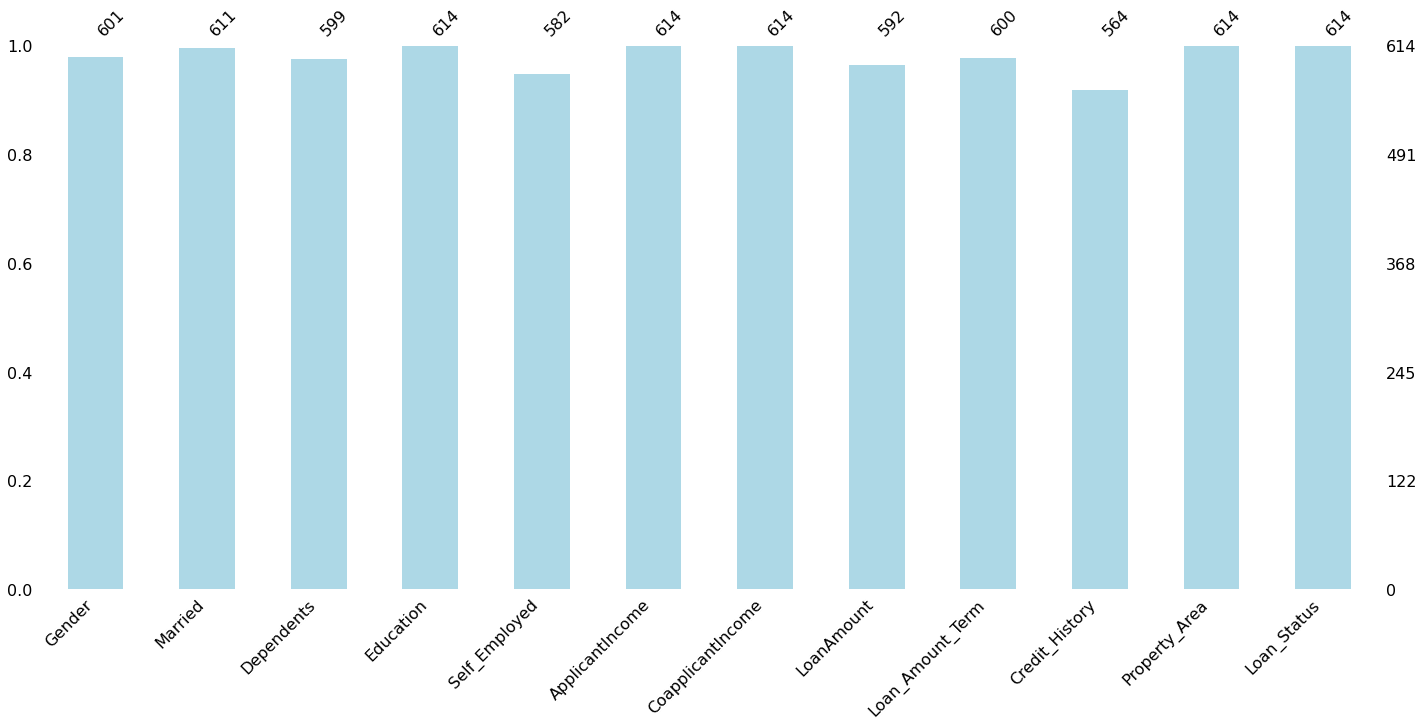

In [11]:
import missingno as msno

msno.bar(df, color="lightblue")
plt.show()

### Handing Missing Values

In [12]:
categorial_column = [
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "Property_Area",
    "Loan_Status",
]
for col in categorial_column:
    df[col].fillna(df[col].value_counts().index[0], inplace=True)

In [13]:
numerical_column = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term",
    "Credit_History",
]
for col in numerical_column:
    df[col].fillna(df[col].median(), inplace=True)

In [14]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

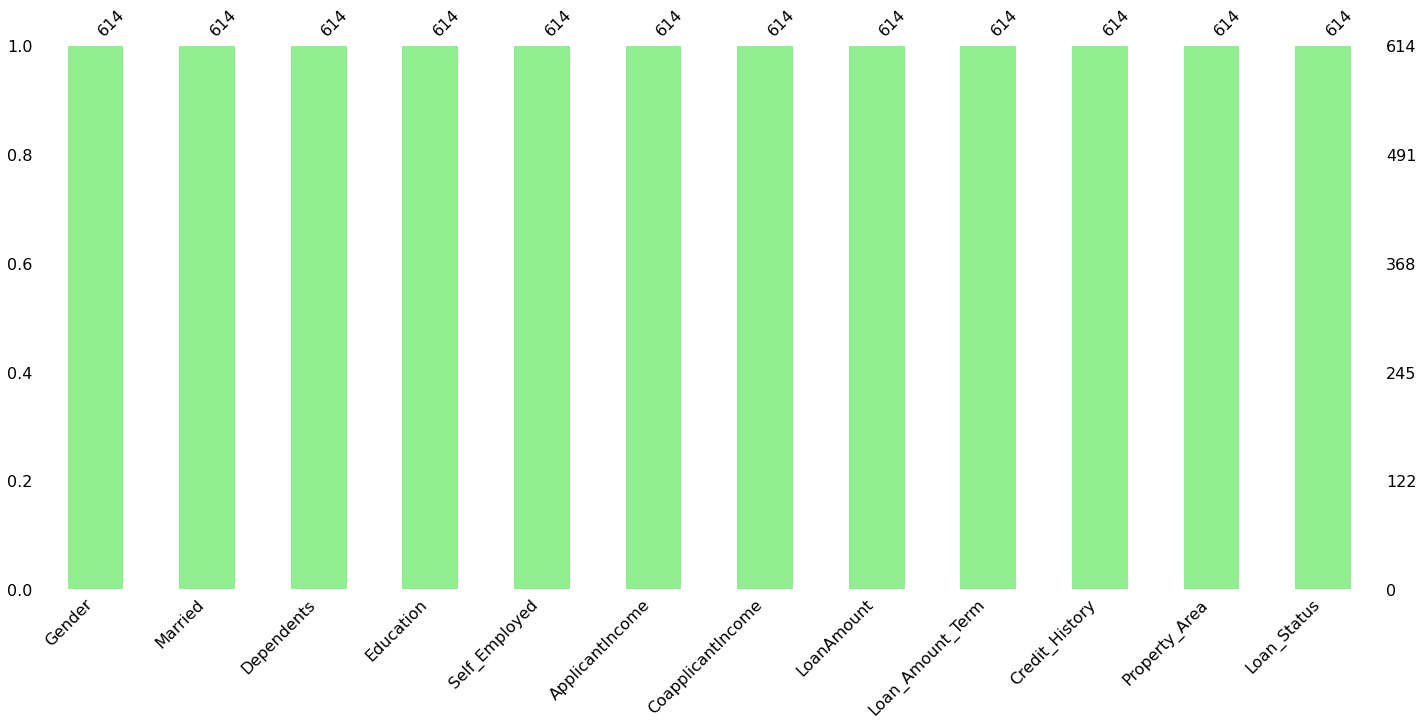

In [15]:
msno.bar(df, color="lightgreen")
plt.show()

In [16]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [17]:
df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [18]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [22]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [23]:
df.groupby("Loan_Status").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,149.890625,344.56250,0.572917
Y,5384.068720,1504.516398,143.869668,341.43128,0.983412


In [24]:
df.groupby("Loan_Status").var()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,4.650638e+07,1.921998e+07,6977.103158,4651.158377,0.245964
Y,3.324032e+07,3.704681e+06,7123.439030,3930.944197,0.016351


In [25]:
df.groupby("Loan_Status").std()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,6819.558528,4384.060103,83.529056,68.199402,0.495948
Y,5765.441615,1924.754855,84.400468,62.697242,0.127872


In [26]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Data Visualization

In [27]:
def plot_numerical(var):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    sns.histplot(x=df[var], ax=axes[0][0], kde=True, bins=20)
    qqplot(df[var], dist="norm", ax=axes[0][1])
    sns.stripplot(x=df.Loan_Status, y=df[var], ax=axes[1][0], palette="bright")
    sns.barplot(x=df.Loan_Status, y=df[var], ax=axes[1][1], palette="bright")
    plt.suptitle(var.title())
    plt.show()

In [28]:
def plot_categorial(var):
    fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
    df[var].value_counts().plot.pie(
        autopct="%.0f%%", labels=df[var].unique(), shadow=True, startangle=180, ax=ax[0]
    )

    df[var].value_counts().plot.barh()
    fig.suptitle("Count of " + var.title())
    plt.show()

In [29]:
def plot_kde(var):
    facet = sns.FacetGrid(df, hue="Loan_Status", aspect=4, palette="bright")
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    plt.title(var.title())
    plt.show()

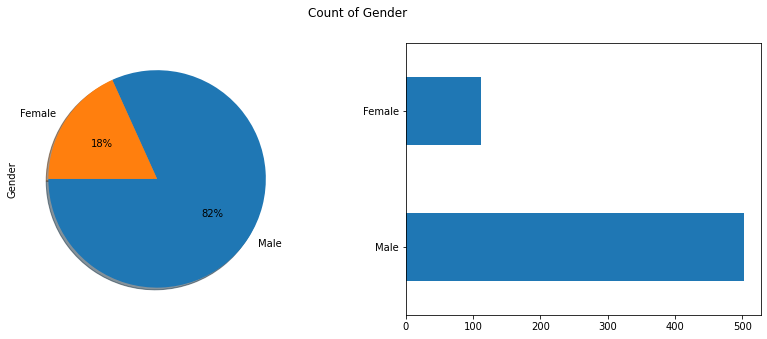

In [30]:
plot_categorial("Gender")

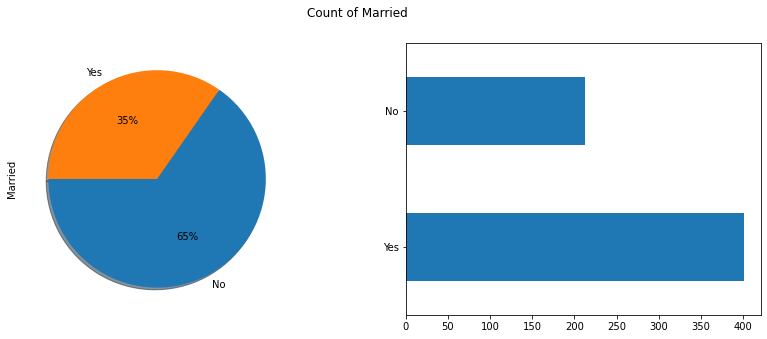

In [31]:
plot_categorial("Married")

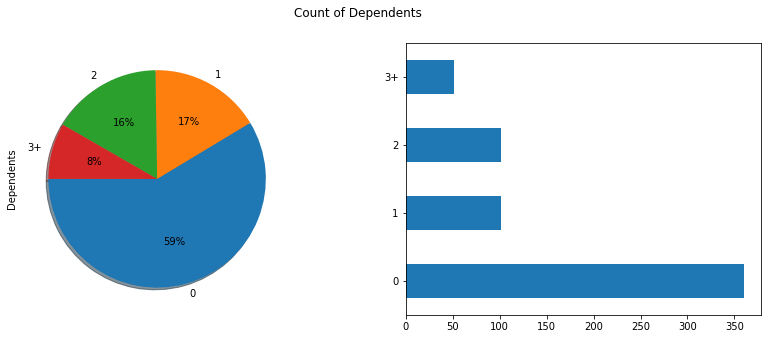

In [32]:
plot_categorial("Dependents")

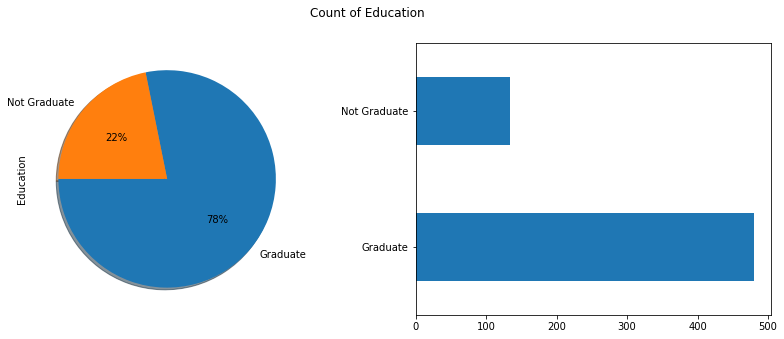

In [33]:
plot_categorial("Education")

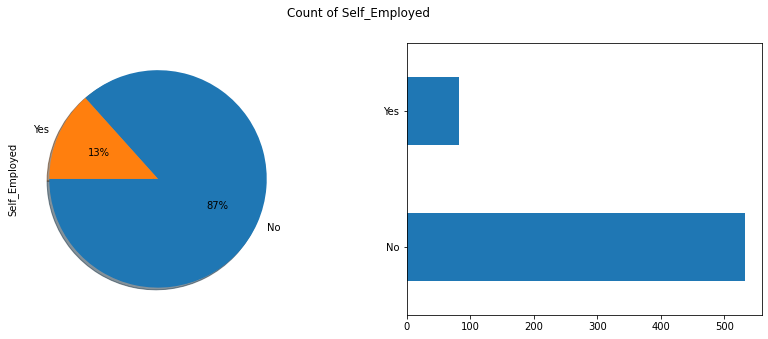

In [34]:
plot_categorial("Self_Employed")

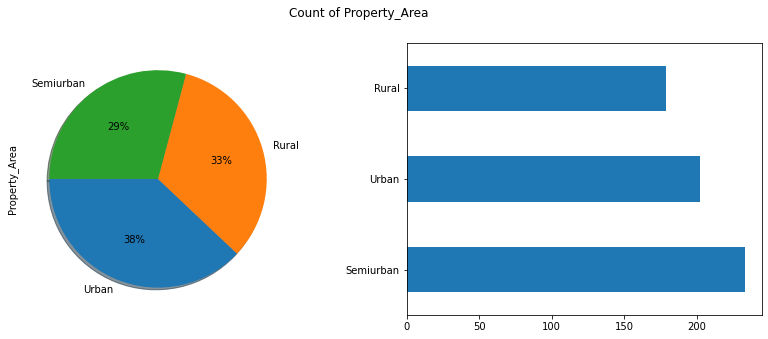

In [35]:
plot_categorial("Property_Area")

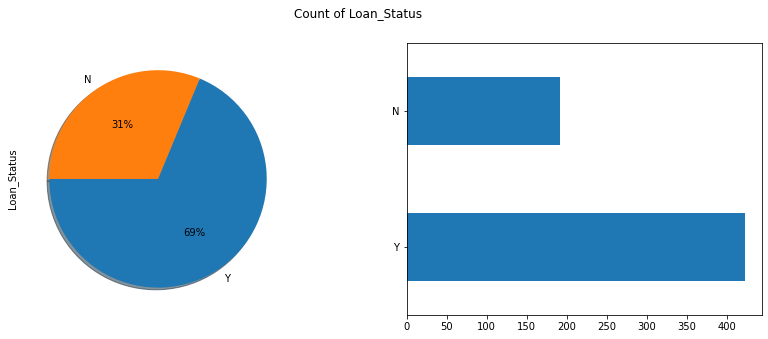

In [36]:
plot_categorial("Loan_Status")

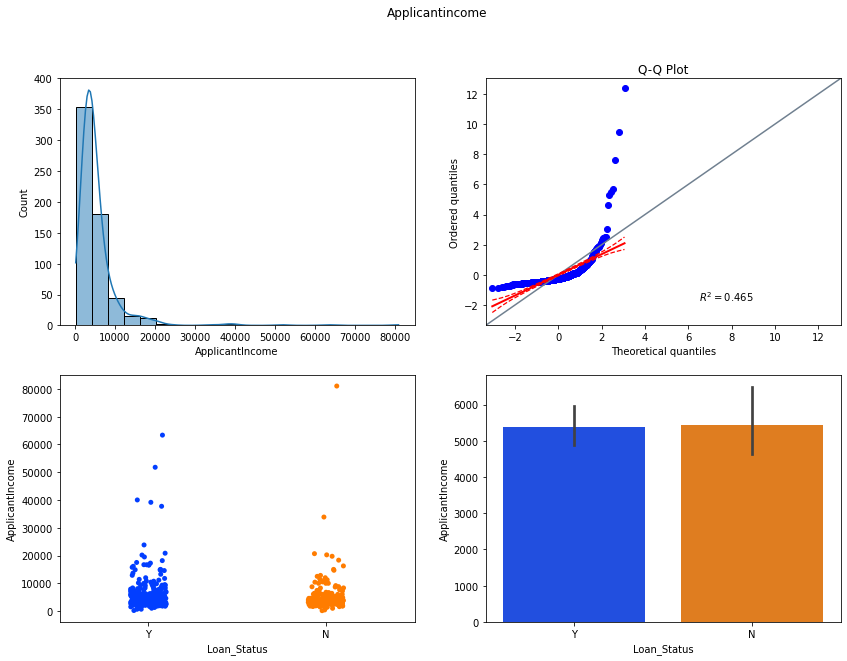

In [37]:
plot_numerical("ApplicantIncome")

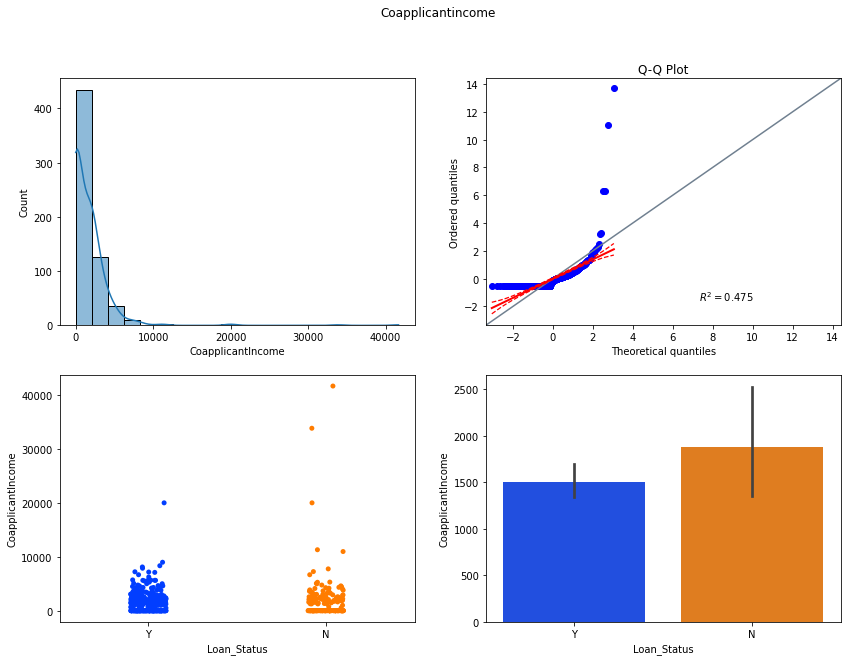

In [38]:
plot_numerical("CoapplicantIncome")

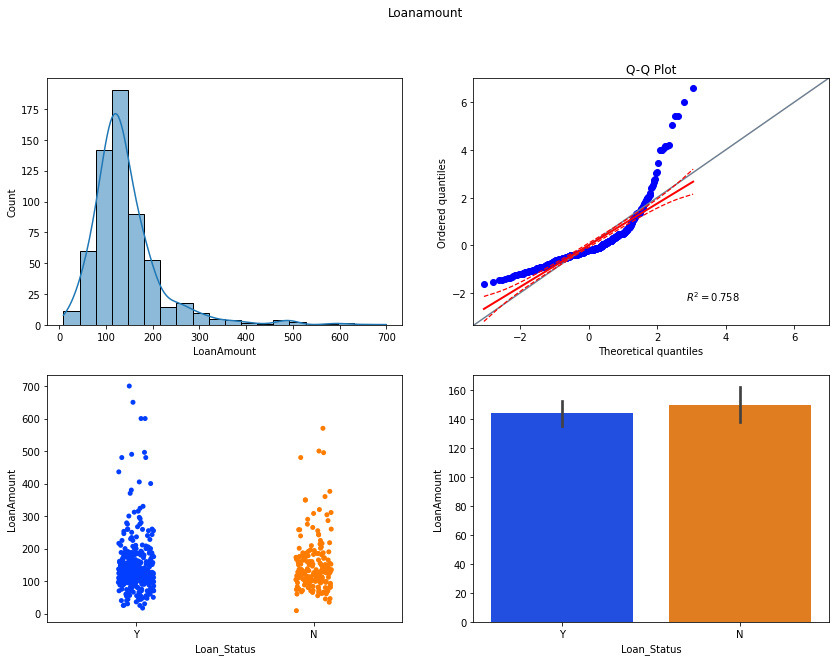

In [39]:
plot_numerical("LoanAmount")

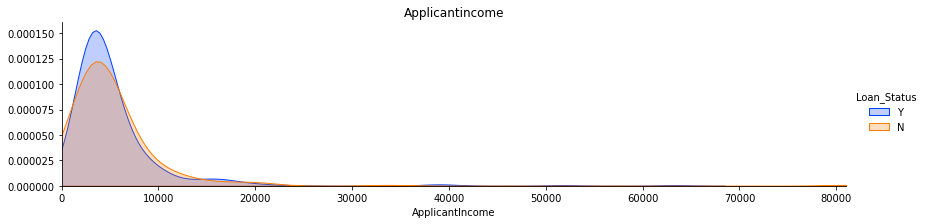

In [40]:
plot_kde("ApplicantIncome")

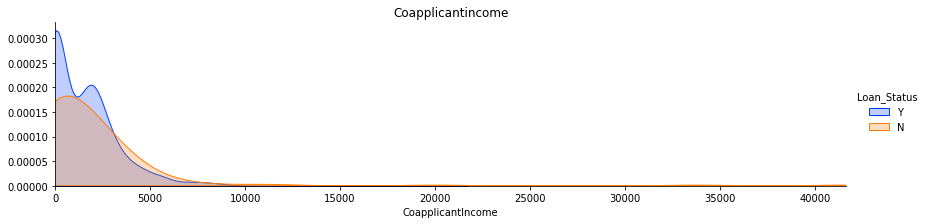

In [41]:
plot_kde("CoapplicantIncome")

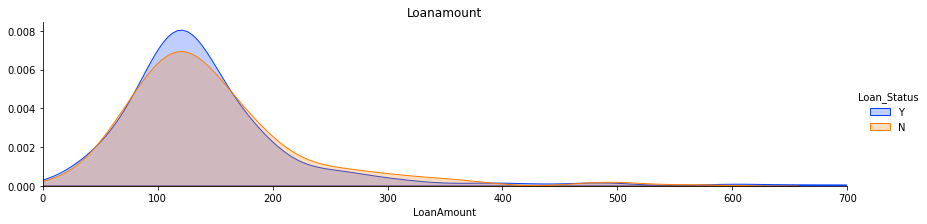

In [42]:
plot_kde("LoanAmount")

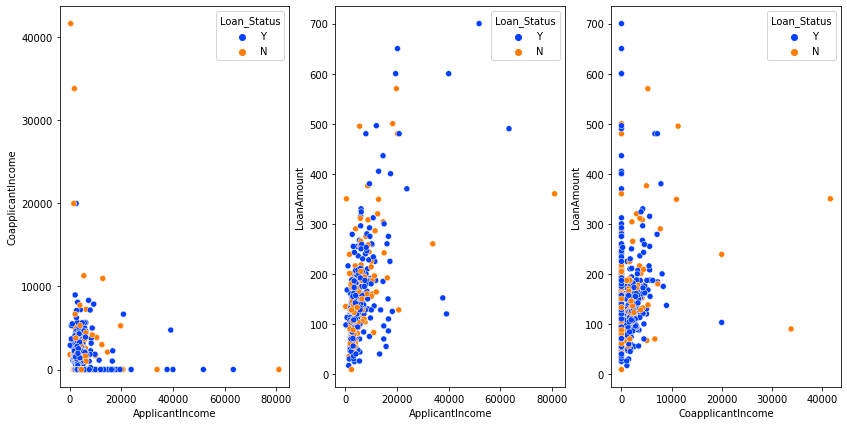

In [43]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 7))
sns.scatterplot(
    data=df,
    x="ApplicantIncome",
    y="CoapplicantIncome",
    hue="Loan_Status",
    ax=ax[0],
    palette="bright",
)
sns.scatterplot(
    data=df,
    x="ApplicantIncome",
    y="LoanAmount",
    hue="Loan_Status",
    ax=ax[1],
    palette="bright",
)
sns.scatterplot(
    data=df,
    x="CoapplicantIncome",
    y="LoanAmount",
    hue="Loan_Status",
    ax=ax[2],
    palette="bright",
)
plt.show()

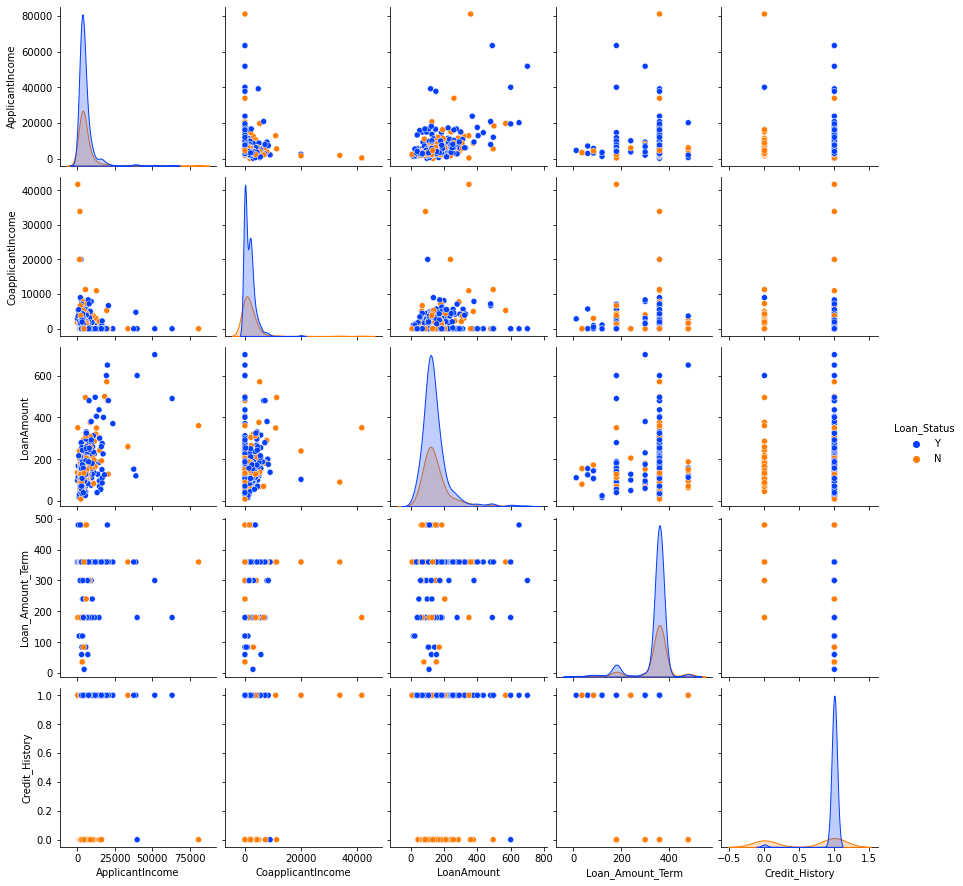

In [44]:
sns.pairplot(df, hue="Loan_Status", palette="bright")
plt.show()

### Data Preprocessing

In [45]:
from yellowbrick.target import (
    FeatureCorrelation,
    BalancedBinningReference,
    ClassBalance,
)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [46]:
class_values = []
for col in categorial_column:
    df[col] = label_encoder.fit_transform(df[col])
    class_values.append({col: label_encoder.classes_})

In [47]:
class_values

[{'Gender': array(['Female', 'Male'], dtype=object)},
 {'Married': array(['No', 'Yes'], dtype=object)},
 {'Dependents': array(['0', '1', '2', '3+'], dtype=object)},
 {'Education': array(['Graduate', 'Not Graduate'], dtype=object)},
 {'Self_Employed': array(['No', 'Yes'], dtype=object)},
 {'Property_Area': array(['Rural', 'Semiurban', 'Urban'], dtype=object)},
 {'Loan_Status': array(['N', 'Y'], dtype=object)}]

In [48]:
for col in categorial_column:
    print(f"{col} : {df[col].unique()}")

Gender : [1 0]
Married : [0 1]
Dependents : [0 1 2 3]
Education : [0 1]
Self_Employed : [0 1]
Property_Area : [2 0 1]
Loan_Status : [1 0]


In [49]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [50]:
df.corrwith(df.Loan_Status).sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
dtype: float64

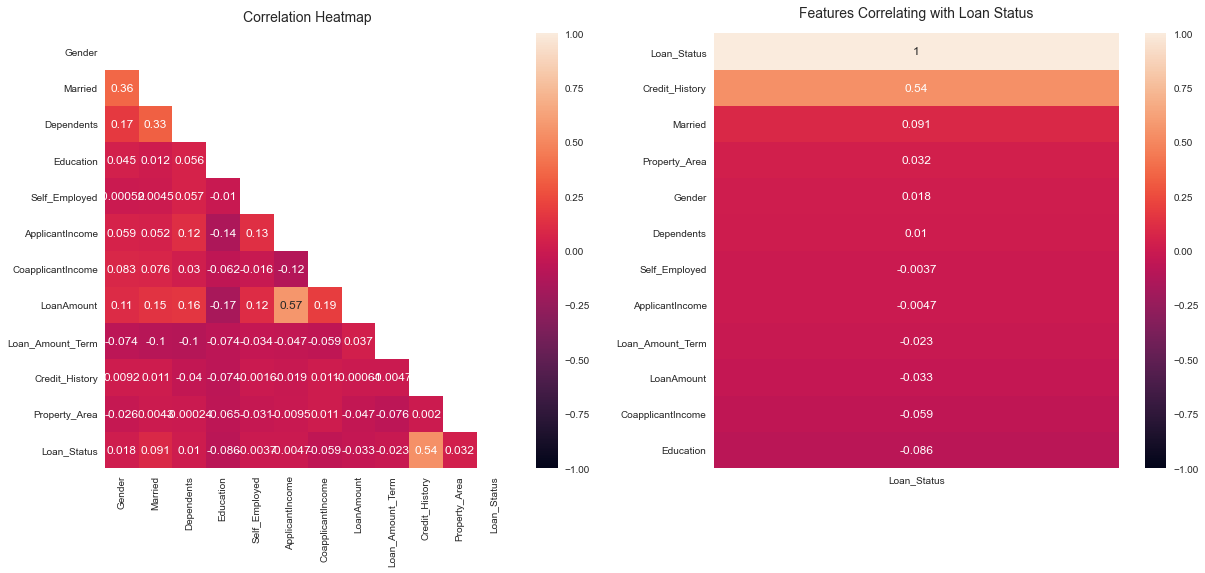

In [51]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0])
cat_heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 14}, pad=12)

heatmap = sns.heatmap(
    resign_corr[["Loan_Status"]].sort_values(by="Loan_Status", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
)
heatmap.set_title(
    "Features Correlating with Loan Status", fontdict={"fontsize": 14}, pad=16
)
plt.show()

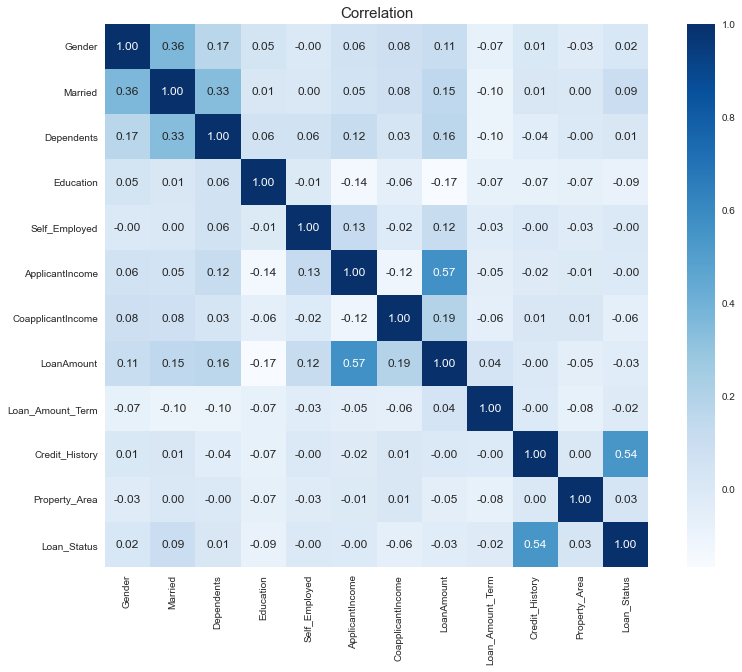

In [52]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", square=True, cmap="Blues")
plt.title("Correlation", size=15)
plt.show()

### Dataset splitting

In [53]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [54]:
X[:5]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [55]:
y[:5]

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

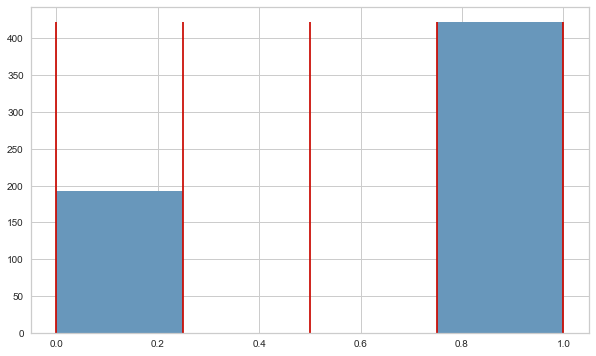

In [57]:
plt.figure(figsize=(10, 6))
visualizer = BalancedBinningReference()
visualizer.fit(y)
plt.show()

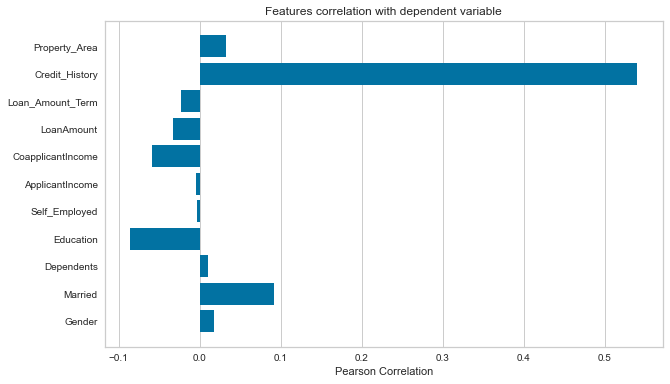

In [58]:
plt.figure(figsize=(10, 6))
visualizer = FeatureCorrelation(method="pearson")
visualizer.fit(X, y)
visualizer.show()
plt.show()

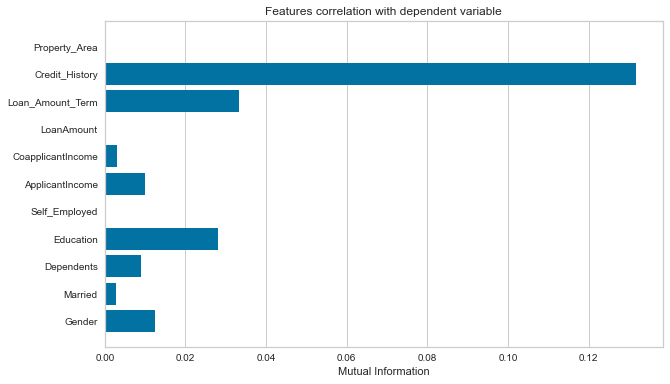

In [59]:
plt.figure(figsize=(10, 6))
visualizer = FeatureCorrelation(method="mutual_info-classification")
visualizer.fit(X, y)
visualizer.show()
plt.show()

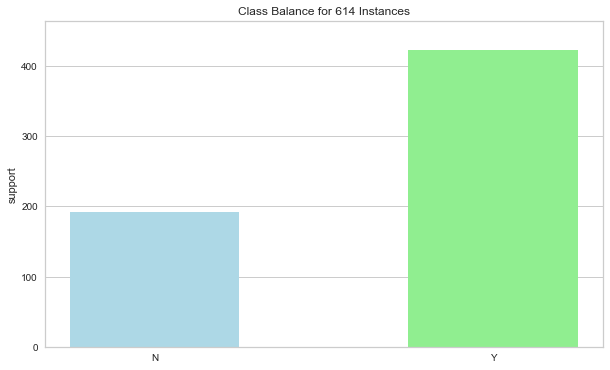

In [60]:
classes = ["N", "Y"]
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

**Sampling Imbalanced Data**

In [61]:
from imblearn import combine

sme = combine.SMOTEENN(random_state=14)
X, y = sme.fit_resample(X, y)

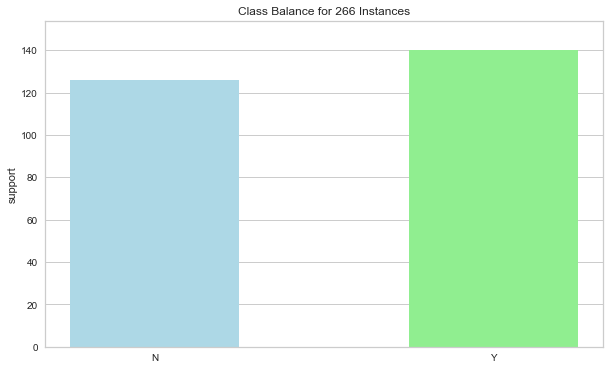

In [62]:
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

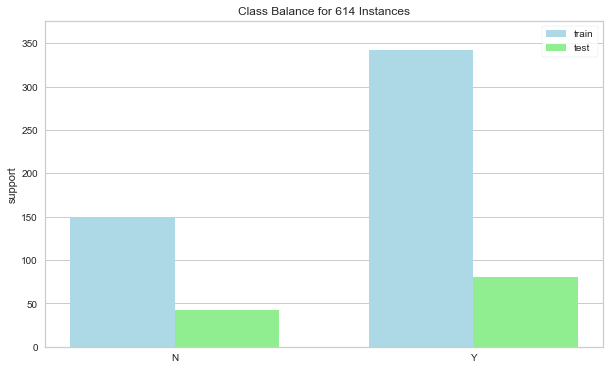

In [63]:
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y_train, y_test)
viz.show()
plt.show()

### Decision Tree Classification

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
)
from yellowbrick.classifier import class_prediction_error

In [65]:
dtree_clf = DecisionTreeClassifier(
    criterion="gini", max_depth=5, min_samples_leaf=35, random_state=12
)
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=35, random_state=12)

In [66]:
y_pred = dtree_clf.predict(X_test)

In [67]:
from sklearn.tree import export_text

text_representation = export_text(dtree_clf)
print(text_representation)

|--- feature_9 <= 0.50
|   |--- feature_5 <= 3559.50
|   |   |--- class: 0
|   |--- feature_5 >  3559.50
|   |   |--- class: 0
|--- feature_9 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_5 <= 4576.50
|   |   |   |--- feature_6 <= 1294.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  1294.50
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  4576.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_7 <= 138.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  138.50
|   |   |   |   |--- class: 1
|   |   |--- feature_10 >  0.50
|   |   |   |--- feature_7 <= 196.00
|   |   |   |   |--- feature_10 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_10 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  196.00
|   |   |   |   |--- class: 1



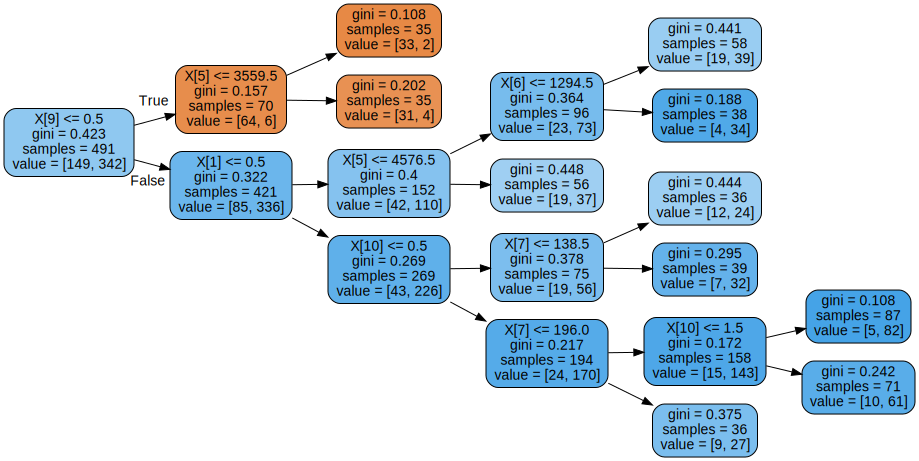

In [68]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    dtree_clf, out_file=None, filled=True, rotate=True, rounded=True
)
graph = graphviz.Source(dot_data, format="png")
graph

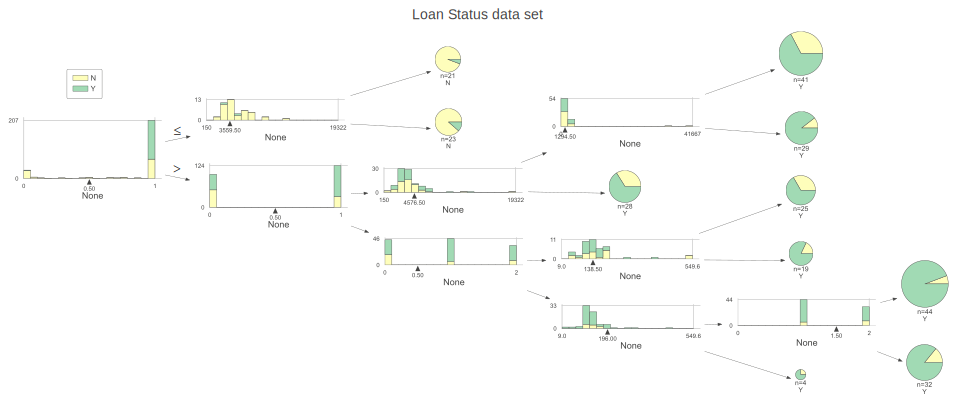

In [69]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    dtree_clf, X, y, orientation="LR", title="Loan Status data set", class_names=classes
)
viz

**Classification Accuracy:**

In [70]:
print(accuracy_score(y_test, y_pred))

0.7886178861788617


**Classification Error:**

In [71]:
print(1 - accuracy_score(y_test, y_pred))

0.21138211382113825


**Sensitivity/True Positive Rate/Recall Score**

In [72]:
print(recall_score(y_test, y_pred))

0.9875


**Precision Score:**

In [73]:
print(precision_score(y_test, y_pred))

0.7596153846153846


**F1 Score**

In [74]:
print(f1_score(y_test, y_pred))

0.8586956521739131


**Class Prediction Error**

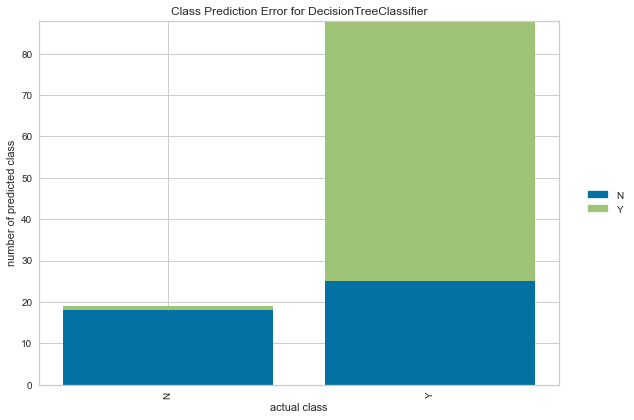

In [75]:
plt.figure(figsize=(10, 6))
visualizer = class_prediction_error(
    dtree_clf, X_train, y_train, X_test, y_test, classes=classes
)
visualizer.show()
plt.show()

**ROC Curve**

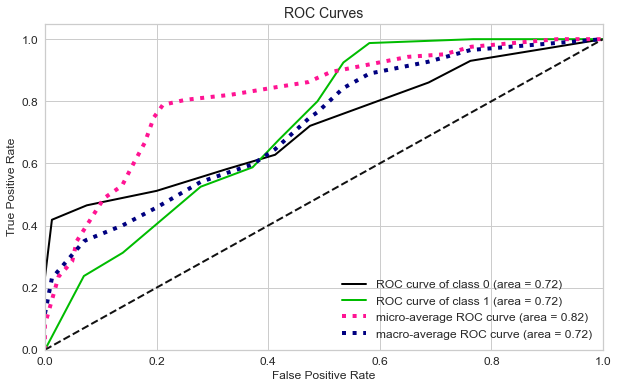

In [76]:
y_probas = dtree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Precision Recall Curve**

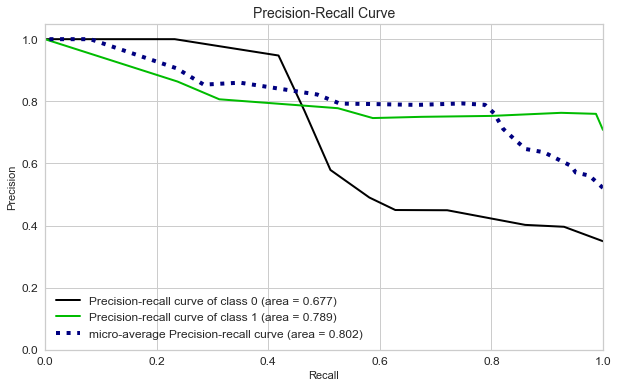

In [77]:
skplt.metrics.plot_precision_recall(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Learning Curve**

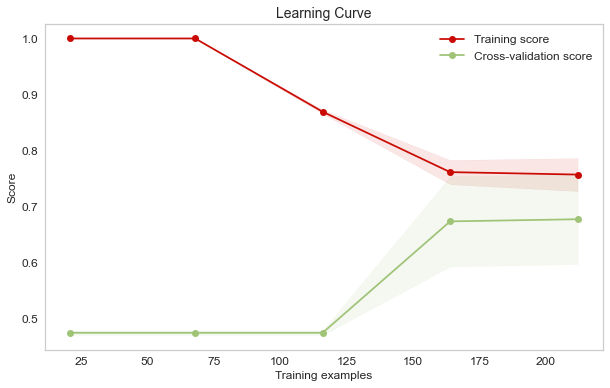

In [78]:
skplt.estimators.plot_learning_curve(
    dtree_clf, X, y, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Lift Curve**

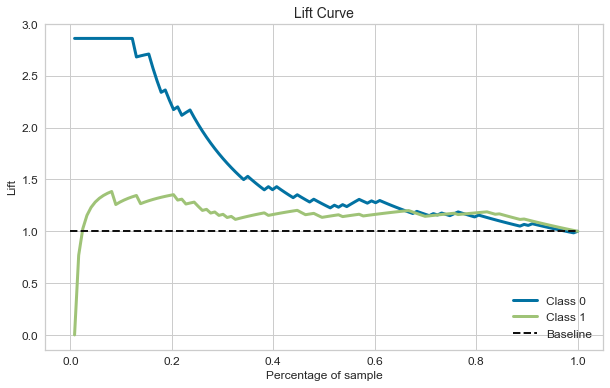

In [79]:
skplt.metrics.plot_lift_curve(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Cumulative Gains Curve**

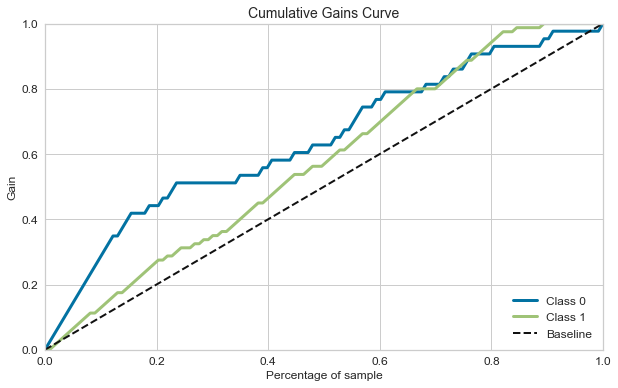

In [80]:
skplt.metrics.plot_cumulative_gain(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Confusion Matrix**

In [81]:
confusion_matrix(y_test, y_pred)

array([[18, 25],
       [ 1, 79]], dtype=int64)

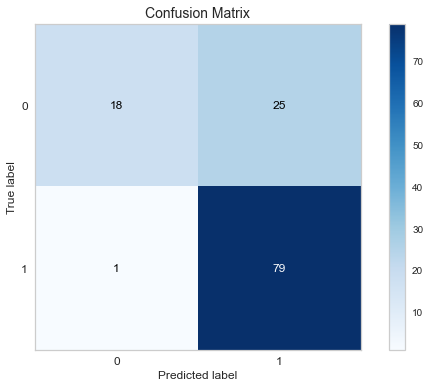

In [82]:
skplt.metrics.plot_confusion_matrix(
    y_test, y_pred, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



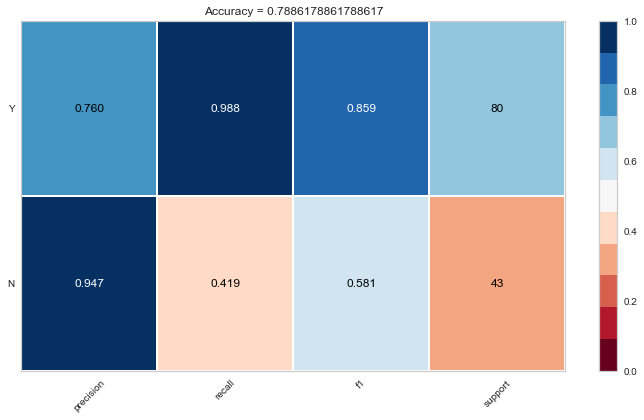

In [84]:
import yellowbrick as yb

plt.figure(figsize=(10, 6))
visualizer = yb.classifier.classification_report(
    dtree_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=classes,
    support=True,
    cmap="RdBu",
    title="Accuracy = " + str(accuracy_score(y_test, y_pred)),
)
plt.show()